In [6]:
# Step 1: Import the libraries we will need
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# --- DATA LOADING AND PREPARATION ---

# Load the dataset from the CSV file.
# Make sure 'train.csv' is in the same folder as your notebook.
# We use a 'try-except' block to handle potential file name variations.
try:
    # Corrected the filename to match what's in your project folder
    df = pd.read_csv('train.csv')
except FileNotFoundError:
    print("Error: Make sure 'train.csv' is in the same folder as your notebook.")
    # You can add alternative filenames here if needed, e.g.,
    # df = pd.read_csv('another_name.csv')

# Convert the 'Order Date' and 'Ship Date' columns to the proper datetime format.
# This is crucial for any time-series analysis.
# We add dayfirst=True to correctly handle dates like "15/04/2018"
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

# Create a new column for 'Year-Month' for easier time-based grouping.
# .dt accessor allows us to get date properties, .to_period('M') gets the month.
df['Order Month'] = df['Order Date'].dt.to_period('M')

# --- INITIAL DATA INSPECTION ---

# Display the first 5 rows to see what the data looks like.
print("--- First 5 Rows of the Data ---")
print(df.head())

# Display a summary of the dataframe, including data types and non-null counts.
# This is a great way to check for missing data.
print("\n--- Dataframe Info ---")
df.info()


--- First 5 Rows of the Data ---
   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
1       2  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
2       3  CA-2017-138688 2017-06-12 2017-06-16    Second Class    DV-13045   
3       4  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   
4       5  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       P

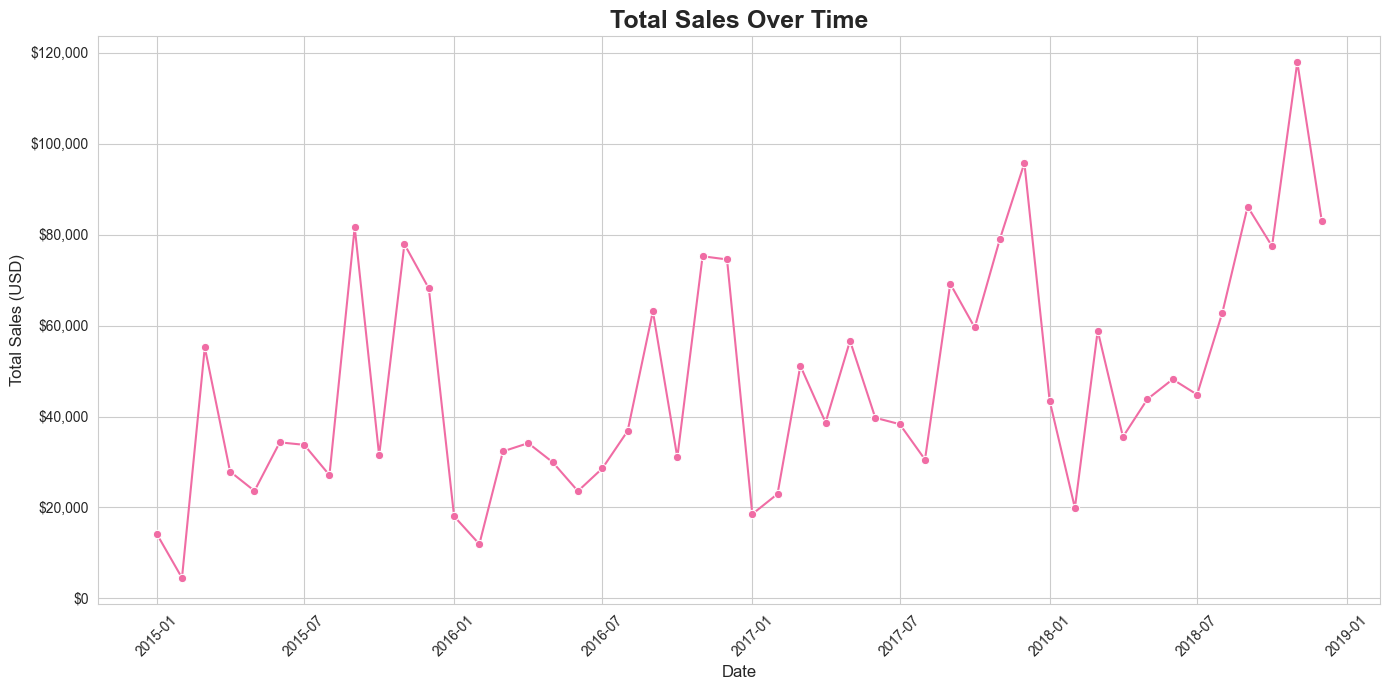

In [7]:
# --- ANALYSIS & VISUALIZATION ---

# Step 2: Analyze Sales Trend Over Time

# Group the data by 'Order Month' and calculate the sum of 'Sales' for each month.
# We convert the 'Order Month' period back to a timestamp for plotting.
monthly_sales = df.groupby('Order Month')['Sales'].sum().reset_index()
monthly_sales['Order Month'] = monthly_sales['Order Month'].dt.to_timestamp()

# --- PLOT THE VISUALIZATION ---

# Set the style for our plots for a professional look
sns.set_style("whitegrid")
plt.figure(figsize=(14, 7)) # Create a figure with a specific size (width, height in inches)

# Create the line plot using seaborn
ax = sns.lineplot(x='Order Month', y='Sales', data=monthly_sales, marker='o', color='#f06ca4')

# --- FORMAT THE PLOT ---

# Set the title and labels for clarity
plt.title('Total Sales Over Time', fontsize=18, weight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales (USD)', fontsize=12)

# Format the Y-axis to show numbers with commas and a dollar sign
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Rotate date labels for better readability
plt.xticks(rotation=45)
plt.tight_layout() # Adjust layout to make sure everything fits

# Display the plot
plt.show()


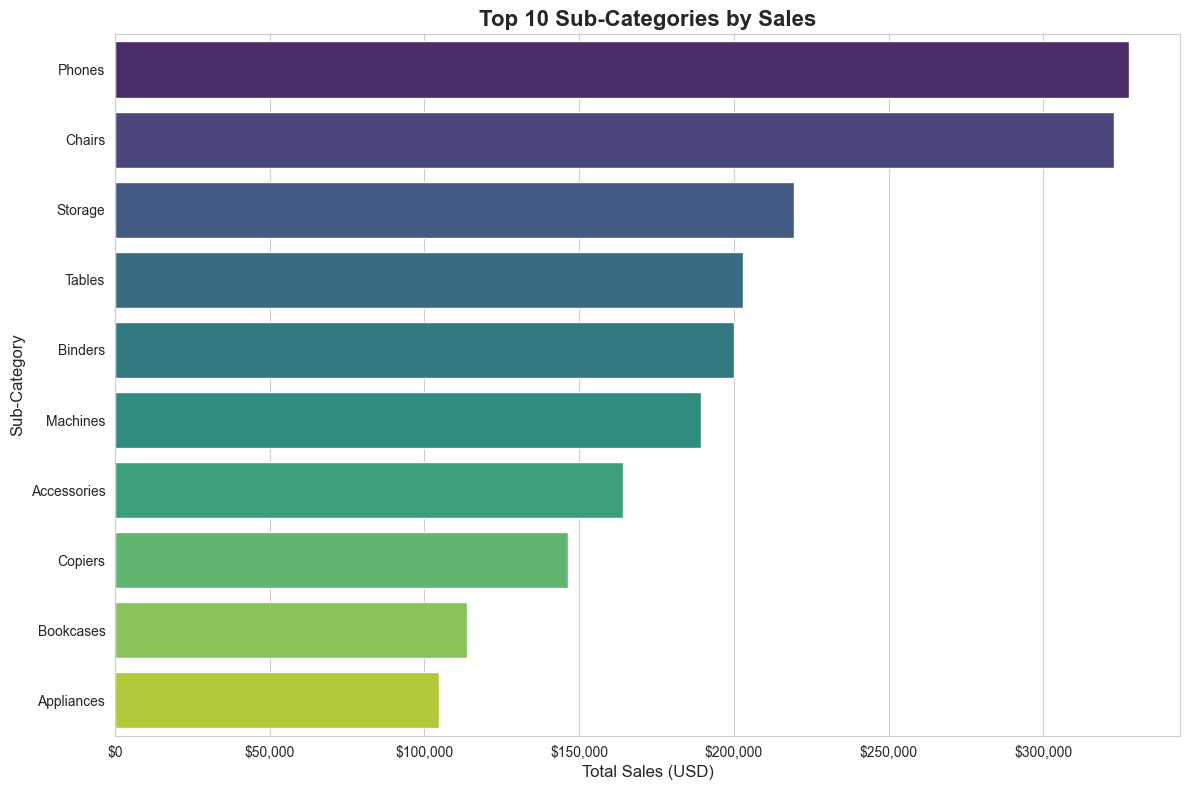


--- Top 10 Sub-Categories by Sales ---
           Category Sub-Category        Sales
16       Technology       Phones  327782.4480
1         Furniture       Chairs  322822.7310
11  Office Supplies      Storage  219343.3920
3         Furniture       Tables  202810.6280
6   Office Supplies      Binders  200028.7850
15       Technology     Machines  189238.6310
13       Technology  Accessories  164186.7000
14       Technology      Copiers  146248.0940
0         Furniture    Bookcases  113813.1987
4   Office Supplies   Appliances  104618.4030


In [10]:
# --- Step 3: Analyse Performance by Product Category ---

# Group data by both Category and Sub-Category to get detailed insights.
# We will calculate the sum of Sales for each group.
# The 'Profit' column is not in this dataset, so we will focus on Sales.
category_performance = df.groupby(['Category', 'Sub-Category'])[['Sales']].sum().reset_index()

# Sort the results to see the top performers by Sales
top_sales_categories = category_performance.sort_values(by='Sales', ascending=False)

# --- PLOT THE VISUALIZATION ---

# Create a figure to hold our plot
# Since we are only plotting one chart now, we can make it a bit smaller.
plt.figure(figsize=(12, 8))

# --- Chart: Top 10 Sub-Categories by Sales ---
# We will create a single, clear chart for sales performance.
# Updated the sns.barplot call to follow the new best practice and remove the warning.
sales_plot = sns.barplot(
    x='Sales', 
    y='Sub-Category', 
    data=top_sales_categories.head(10), # Plotting the top 10
    palette='viridis',
    hue='Sub-Category', # Assigning the y-variable to hue as recommended
    legend=False      # Hiding the legend as it's not needed
)
plt.title('Top 10 Sub-Categories by Sales', fontsize=16, weight='bold')
plt.xlabel('Total Sales (USD)', fontsize=12)
plt.ylabel('Sub-Category', fontsize=12)

# Format the x-axis to show currency
sales_plot.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))


# --- FINAL FORMATTING ---
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

# Display the top 10 rows of the resulting table for reference
print("\n--- Top 10 Sub-Categories by Sales ---")
print(top_sales_categories.head(10))

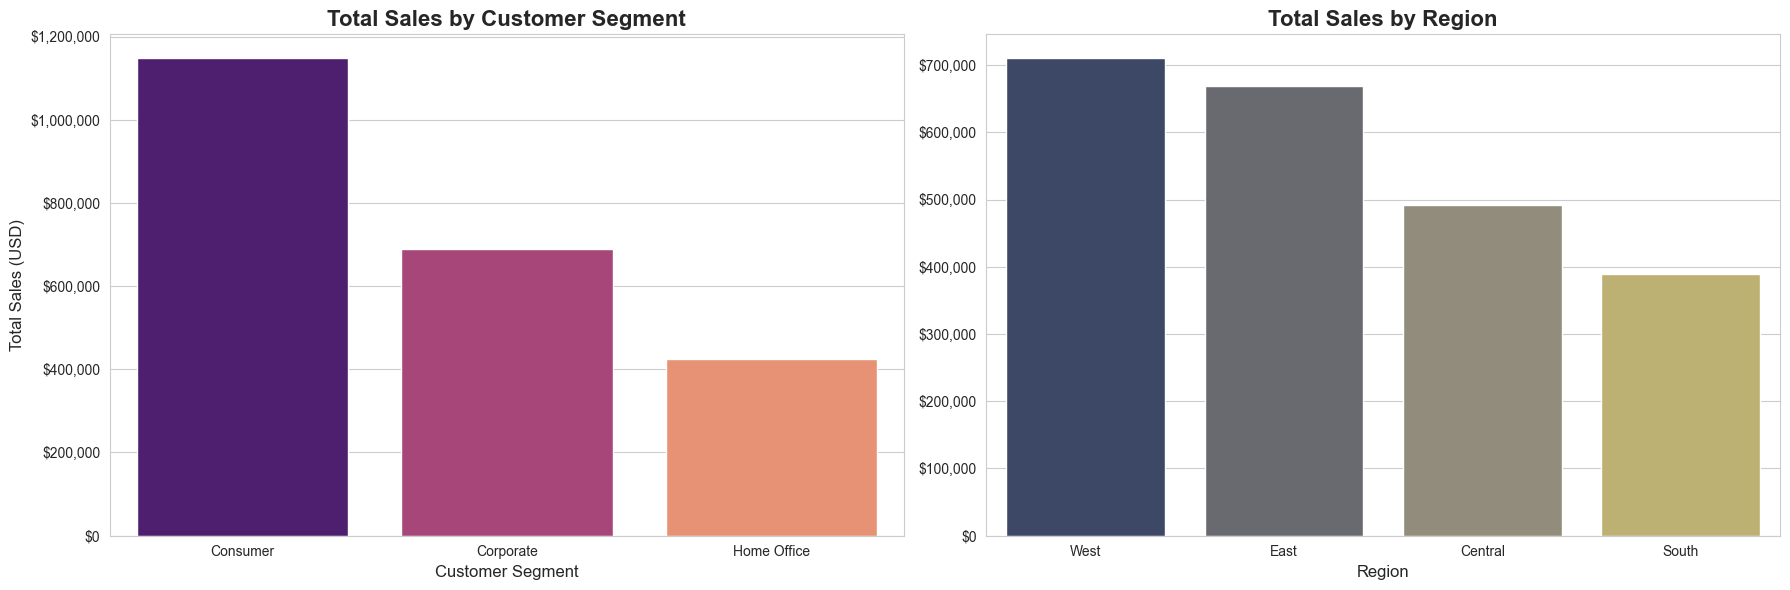


--- Sales by Customer Segment ---
Segment
Consumer       1.148061e+06
Corporate      6.884941e+05
Home Office    4.249822e+05
Name: Sales, dtype: float64

--- Sales by Region ---
Region
West       710219.6845
East       669518.7260
Central    492646.9132
South      389151.4590
Name: Sales, dtype: float64


In [11]:
# --- Step 4: Analyze Sales by Customer Segment and Region ---

# Create a figure to hold our two new subplots
plt.figure(figsize=(18, 6))

# --- Chart 1: Sales by Customer Segment ---
plt.subplot(1, 2, 1) # (1 row, 2 columns, 1st subplot)
segment_sales = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
segment_plot = sns.barplot(
    x=segment_sales.index, 
    y=segment_sales.values,
    palette='magma',
    hue=segment_sales.index, # Using index for hue to match palette
    legend=False
)
plt.title('Total Sales by Customer Segment', fontsize=16, weight='bold')
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Total Sales (USD)', fontsize=12)
segment_plot.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))


# --- Chart 2: Sales by Region ---
plt.subplot(1, 2, 2) # (1 row, 2 columns, 2nd subplot)
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
region_plot = sns.barplot(
    x=region_sales.index, 
    y=region_sales.values,
    palette='cividis',
    hue=region_sales.index,
    legend=False
)
plt.title('Total Sales by Region', fontsize=16, weight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('') # Hiding the y-axis label for a cleaner look
region_plot.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))


# --- FINAL FORMATTING ---
plt.tight_layout()
plt.show()

# Display the resulting data tables for reference
print("\n--- Sales by Customer Segment ---")
print(segment_sales)

print("\n--- Sales by Region ---")
print(region_sales)

In [2]:
# --- Step 5: Build a Sales Forecast ---

# First, we need to make sure the statsmodels library is installed.
# You can run this in your command prompt: py -m pip install statsmodels
import statsmodels.api as sm

# Prepare the data for forecasting. We need a simple time series of sales.
# We set the 'Order Month' as the index of our series.
ts_data = df.groupby('Order Month')['Sales'].sum()
ts_data.index = ts_data.index.to_timestamp()

# --- BUILD AND TRAIN THE FORECASTING MODEL ---

# We will use a SARIMA model, which is great for data with seasonal patterns.
# The (1, 1, 1) and (1, 1, 1, 12) are standard starting parameters for this kind of model.
# p,d,q are for non-seasonal components, P,D,Q,m are for seasonal components.
model = sm.tsa.statespace.SARIMAX(
    ts_data,
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)

# Fit the model to our historical data
results = model.fit(disp=False)

# --- GENERATE AND PLOT THE FORECAST ---

# Generate predictions for the next 12 months
forecast = results.get_forecast(steps=12)
forecast_ci = forecast.conf_int() # Get the confidence interval for the forecast

# --- PLOT THE RESULTS ---

# Create a figure to display the historical data and our forecast
plt.figure(figsize=(14, 7))
ax = ts_data.plot(label='Observed Sales', color='#00BFFF') # Plotting historical data

# Plot the forecast
forecast.predicted_mean.plot(ax=ax, label='Forecast', color='#FF8C00', linestyle='--')

# Add a shaded confidence interval to show the range of likely outcomes
ax.fill_between(
    forecast_ci.index,
    forecast_ci.iloc[:, 0],
    forecast_ci.iloc[:, 1],
    color='k',
    alpha=.15
)

# --- FORMAT THE PLOT ---
plt.title('Sales Forecast for the Next 12 Months', fontsize=18, weight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales (USD)', fontsize=12)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
plt.legend()
plt.tight_layout()
plt.show()

# Print the forecasted values for the next 12 months
print("\n--- Forecasted Sales for the Next 12 Months ---")
print(forecast.predicted_mean)


ImportError: cannot import name '_lazywhere' from 'scipy._lib._util' (C:\Users\swise\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\_lib\_util.py)